# Week 9 Instructor-led lab: Statistics in Python

Author: Haiheng Xu  
Course: BGEN632 Grad. Intro. to Python  
Term: Spring 2025  
Date: April 24, 2025 

## Notebook Setup

In [167]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [169]:
# set working directory
os.chdir("C:\\Users\\haihe\\Desktop\\Classes\\Intro to Python\\week9labs\\data")  # change this to your filepath
os.getcwd()  # confirm change

'C:\\Users\\haihe\\Desktop\\Classes\\Intro to Python\\week9labs\\data'

In [171]:
# Load hospital and personnel data

p_df = pd.read_table('CaliforniaHospitalData_Personnel.txt', sep='\t')
h_df = pd.read_csv('CaliforniaHospitalData.csv')
p_df.info()
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HospitalID     64 non-null     int64 
 1   Work_ID        64 non-null     int64 
 2   LastName       64 non-null     object
 3   FirstName      64 non-null     object
 4   Gender         64 non-null     object
 5   PositionID     64 non-null     int64 
 6   PositionTitle  64 non-null     object
 7   Compensation   64 non-null     int64 
 8   MaxTerm        64 non-null     int64 
 9   StartDate      64 non-null     object
 10  Phone          64 non-null     object
 11  Email          64 non-null     object
dtypes: int64(5), object(7)
memory usage: 6.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HospitalID   61 non-null     int64  
 1   Name       

## Analysis

In [174]:
# Merging datasets

hp_df = p_df.merge(h_df, on='HospitalID')

In [176]:
# Removing columns

hp_df.drop(['Work_ID', 'PositionID', 'Website'], axis=1, inplace=True)

In [178]:
# Add myself to a hospital

# Create dictionaries for the new position
my_position = {'HospitalID ': '13738',
           'Name': 'St. Mary Medical Center',
           'LastName': 'Xu',
           'FirstName': 'Haiheng' ,
           'Gender': 'M',
           'PositionTitle': 'Acting Director',
           'Compensation': '248904',
           'MaxTerm': '8',
           'StartDate': '4/24/2025'
          }

# Convert the dictionary to DataFrame
df_my_position = pd.DataFrame([my_position])

# Use concat to merge dataframes
hp_df = pd.concat([hp_df, df_my_position], ignore_index=True)

In [180]:
# Convert all date-time columns into a datetime data type

hp_df['StartDate'] = pd.to_datetime(hp_df['StartDate'])



In [182]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HospitalID     61 non-null     float64       
 1   LastName       62 non-null     object        
 2   FirstName      62 non-null     object        
 3   Gender         62 non-null     object        
 4   PositionTitle  62 non-null     object        
 5   Compensation   62 non-null     object        
 6   MaxTerm        62 non-null     object        
 7   StartDate      62 non-null     datetime64[ns]
 8   Phone          61 non-null     object        
 9   Email          61 non-null     object        
 10  Name           62 non-null     object        
 11  Zip            61 non-null     object        
 12  TypeControl    61 non-null     object        
 13  Teaching       61 non-null     object        
 14  DonorType      61 non-null     object        
 15  NoFTE          61 non-nul

In [184]:
# Ensure object data has the categorical data type

# Convert to categorical 
hp_df['TypeControl'] = hp_df.TypeControl.astype('category')
hp_df['Teaching'] = hp_df.Teaching.astype('category')
hp_df['DonorType'] = hp_df.DonorType.astype('category')
hp_df['Gender'] = hp_df.Gender.astype('category')
hp_df['PositionTitle'] = hp_df.PositionTitle.astype('category')

hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HospitalID     61 non-null     float64       
 1   LastName       62 non-null     object        
 2   FirstName      62 non-null     object        
 3   Gender         62 non-null     category      
 4   PositionTitle  62 non-null     category      
 5   Compensation   62 non-null     object        
 6   MaxTerm        62 non-null     object        
 7   StartDate      62 non-null     datetime64[ns]
 8   Phone          61 non-null     object        
 9   Email          61 non-null     object        
 10  Name           62 non-null     object        
 11  Zip            61 non-null     object        
 12  TypeControl    61 non-null     category      
 13  Teaching       61 non-null     category      
 14  DonorType      61 non-null     category      
 15  NoFTE          61 non-nul

In [186]:
# Provide a summary of the mean, median, minimum value, and maximum value for each numeric variable

hp_df.describe(include=['number'])

,HospitalID,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
count,61.000000,61.000000,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,61.000000
mean,31828.459016,1350.264262,6.695836e+05,1.662706e+08,9.015808e+07,2.562733e+08,-1.553491e+05,194.524590
std,11013.958491,2025.285385,1.097513e+06,2.827876e+08,1.372897e+08,4.249851e+08,7.154457e+07,221.832941
min,10767.000000,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000
25%,21053.000000,215.500000,6.579243e+04,1.368450e+07,1.426128e+07,2.416452e+07,-1.108177e+06,42.000000
50%,33251.000000,374.320000,1.723989e+05,3.184268e+07,3.491622e+07,6.339822e+07,1.572695e+06,99.000000
75%,39102.000000,1216.000000,5.409751e+05,1.737450e+08,9.306671e+07,1.998738e+08,6.198330e+06,234.000000
max,46996.000000,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000


In [188]:
# Provide summary statistics of your text variables

hp_df.describe(include=['object'])

,LastName,FirstName,Compensation,MaxTerm,Phone,Email,Name,Zip,HospitalID
count,62,62,62,62,61,61,62,61,1
unique,24,20,5,5,24,24,61,61,1
top,Smith,David,46978,4,405-744-2238,jose.rodriguez@edihealth.com,St. Mary Medical Center,92392,13738
freq,4,6,24,24,3,3,2,1,1


In [190]:
# Provide summary statistics of your categorical variables

hp_df.describe(include=['category'])

,Gender,PositionTitle,TypeControl,Teaching,DonorType
count,62,62,61,61,61
unique,2,4,4,2,2
top,F,Regional Representative,Non Profit,Small/Rural,Charity
freq,32,24,37,44,44


## Visualizations

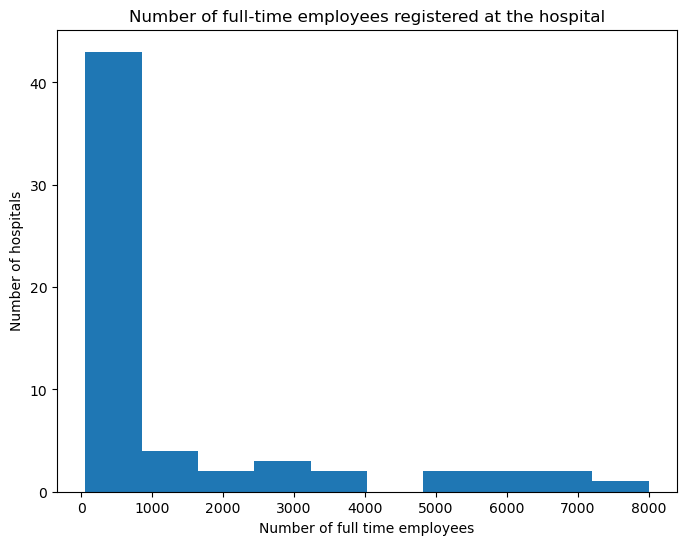

In [193]:
# Histogram for NoFTE
plt.figure(figsize = (8,6))
           
plt.hist(hp_df["NoFTE"])
           
plt.title("Number of full-time employees registered at the hospital")
plt.xlabel("Number of full time employees")
plt.ylabel("Number of hospitals")
plt.show()


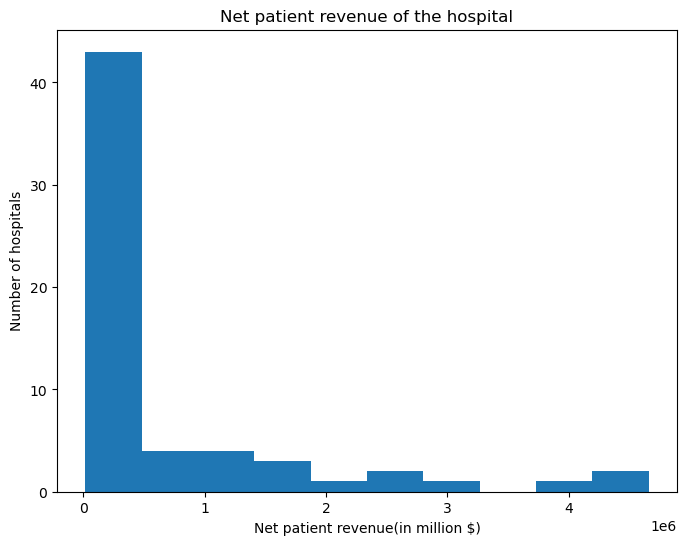

In [195]:
# Histogram for NetPatRev
plt.figure(figsize = (8,6))
           
plt.hist(hp_df["NetPatRev"])
           
plt.title("Net patient revenue of the hospital")
plt.xlabel("Net patient revenue(in million $)")
plt.ylabel("Number of hospitals")
plt.show()


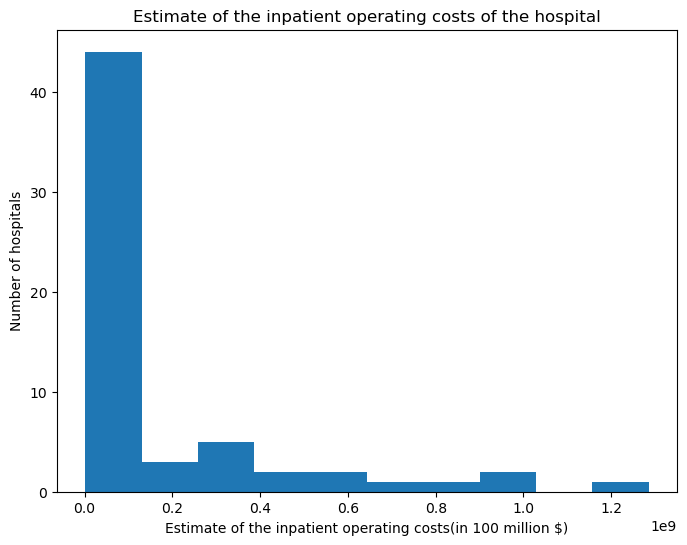

In [197]:
# Histogram for InOperExp
plt.figure(figsize = (8,6))
           
plt.hist(hp_df["InOperExp"])
           
plt.title("Estimate of the inpatient operating costs of the hospital")
plt.xlabel("Estimate of the inpatient operating costs(in 100 million $)")
plt.ylabel("Number of hospitals")
plt.show()


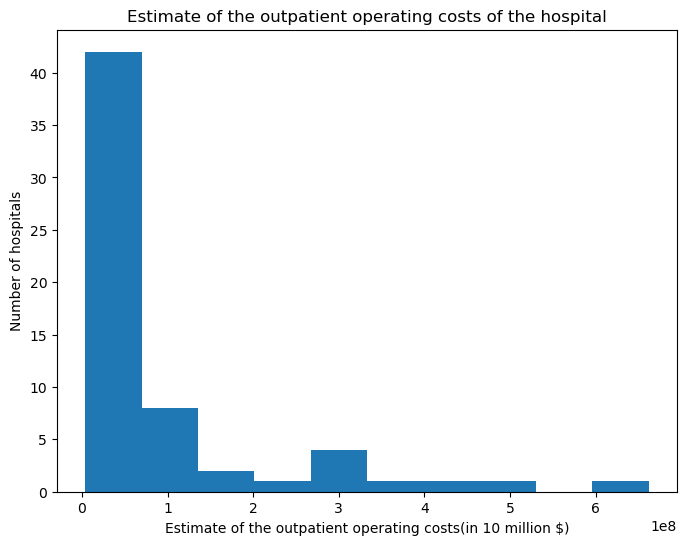

In [199]:
# Histogram for OutOperExp
plt.figure(figsize = (8,6))
           
plt.hist(hp_df["OutOperExp"])
           
plt.title("Estimate of the outpatient operating costs of the hospital")
plt.xlabel("Estimate of the outpatient operating costs(in 10 million $)")
plt.ylabel("Number of hospitals")
plt.show()


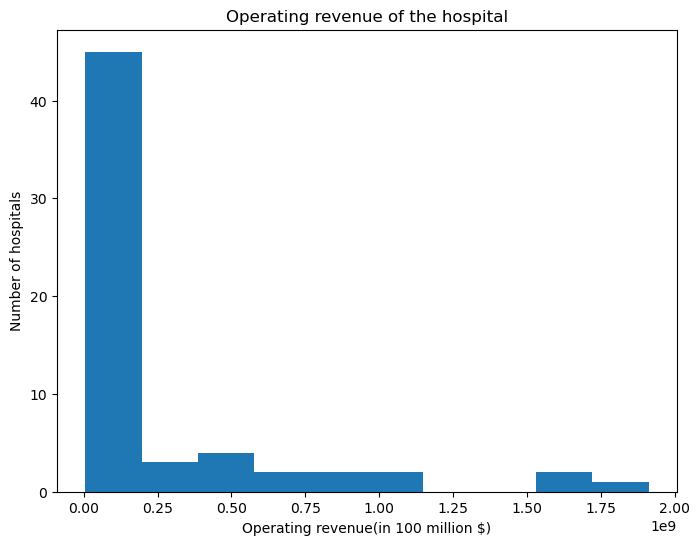

In [200]:
# Histogram for OperRev
plt.figure(figsize = (8,6))
           
plt.hist(hp_df["OperRev"])
           
plt.title("Operating revenue of the hospital")
plt.xlabel("Operating revenue(in 100 million $)")
plt.ylabel("Number of hospitals")
plt.show()


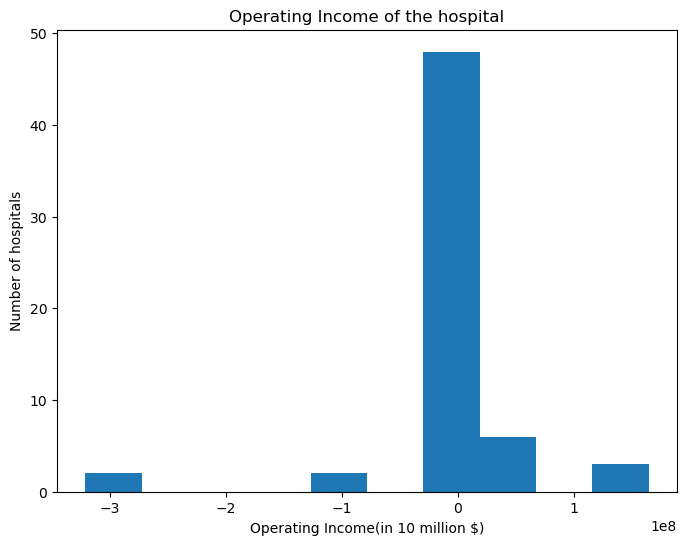

In [203]:
# Histogram for OperInc
plt.figure(figsize = (8,6))
           
plt.hist(hp_df["OperInc"])
           
plt.title("Operating Income of the hospital")
plt.xlabel("Operating Income(in 10 million $)")
plt.ylabel("Number of hospitals")
plt.show()


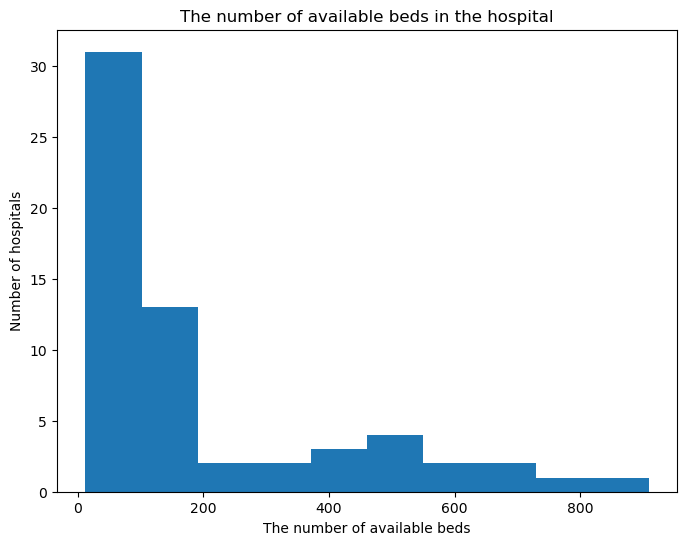

In [205]:
# Histogram for AvlBeds
plt.figure(figsize = (8,6))
           
plt.hist(hp_df["AvlBeds"])
           
plt.title("The number of available beds in the hospital")
plt.xlabel("The number of available beds")
plt.ylabel("Number of hospitals")
plt.show()

<Axes: xlabel='NoFTE', ylabel='NetPatRev'>

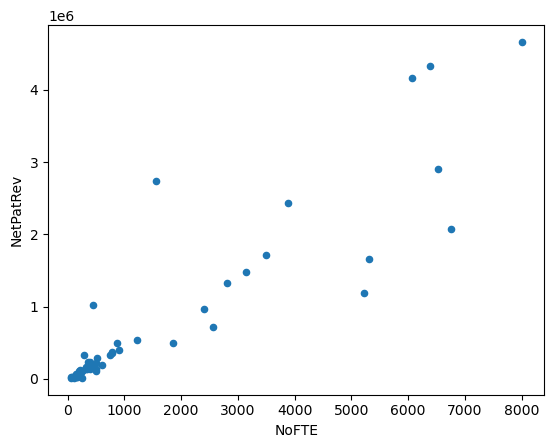

In [207]:
# Scatterplot of net patient revenue and NoFTE

hp_df.plot.scatter(x='NoFTE', y='NetPatRev')

There is a linearity between net patient revenue and the number of full-time employees registered at the hospital.
As the number of full-time employees registered at the hospital increases, the hospital's net patient revenue increases.

<Axes: xlabel='InOperExp', ylabel='NetPatRev'>

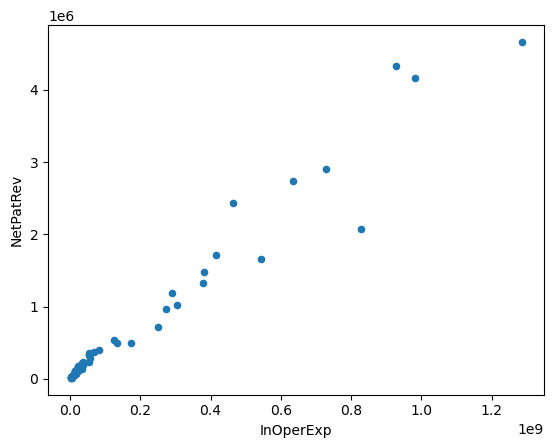

In [210]:
# Scatterplot of net patient revenue and InOperExp

hp_df.plot.scatter(x='InOperExp', y='NetPatRev')

There is a linearity between net patient revenue and the estimate of the inpatient operating costs at the hospital.
As the number of estimates of the inpatient operating costs increases, the hospital's net patient revenue increases.

<Axes: xlabel='OutOperExp', ylabel='NetPatRev'>

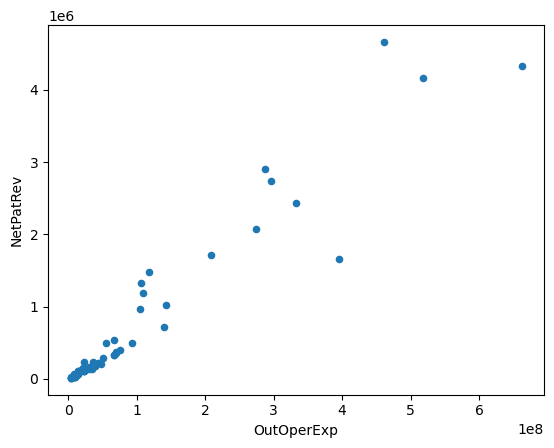

In [213]:
# Scatterplot of net patient revenue and OutOperExp

hp_df.plot.scatter(x='OutOperExp', y='NetPatRev')

There is a linearity between net patient revenue and the estimate of the outpatient operating costs at the hospital.
As the number of estimate of the outpatient operating costs increases, the hospital's net patient revenue increases.

<Axes: xlabel='OperRev', ylabel='NetPatRev'>

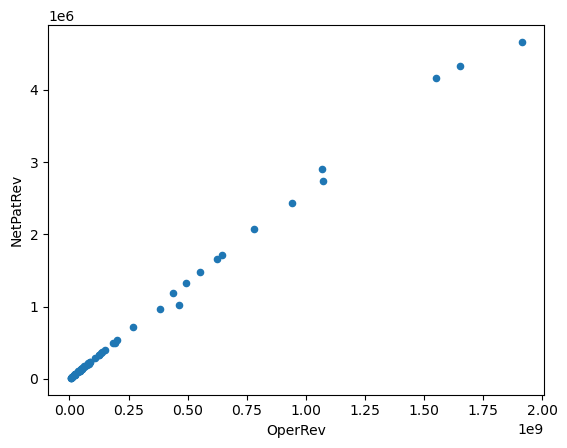

In [216]:
# Scatterplot of net patient revenue and OperRev

hp_df.plot.scatter(x='OperRev', y='NetPatRev')

There is a linearity between net patient revenue and the operating revenue of the hospital. As the number of operating revenue of the hospital increases, the hospital's net patient revenue increases.

<Axes: xlabel='OperInc', ylabel='NetPatRev'>

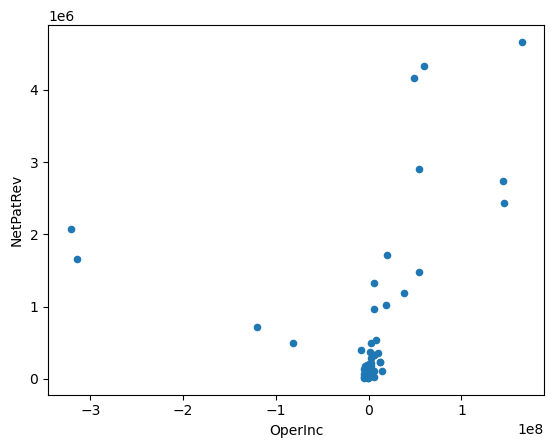

In [219]:
# Scatterplot of net patient revenue and OperInc

hp_df.plot.scatter(x='OperInc', y='NetPatRev')

There is no linearity between net patient revenue and the net operating Income of the hospital according to the plot.

<Axes: xlabel='AvlBeds', ylabel='NetPatRev'>

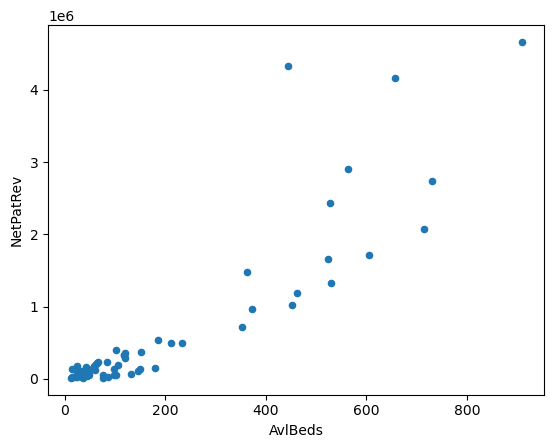

In [222]:
# Scatterplot of net patient revenue and AvlBeds

hp_df.plot.scatter(x='AvlBeds', y='NetPatRev')

There is a linearity between net patient revenue and the number of available beds in the hospital. As the number of available beds in the hospital increases, the hospital's net patient revenue increases.

<Axes: >

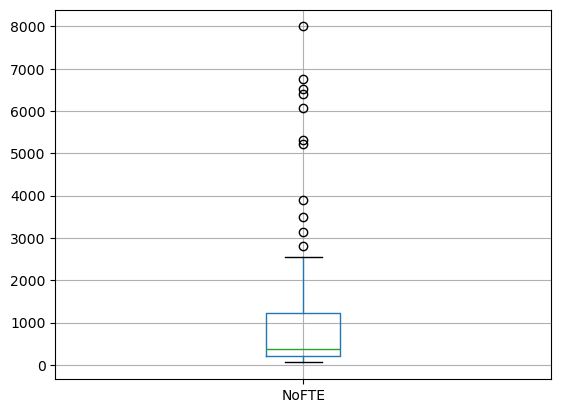

In [75]:
# Boxplot for NoFTE

hp_df.loc[:,['NoFTE']].boxplot()

<Axes: >

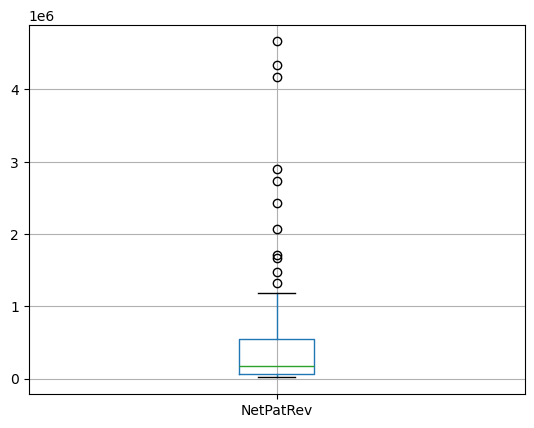

In [77]:
# Boxplot for NetPatRev

hp_df.loc[:,['NetPatRev']].boxplot()

<Axes: >

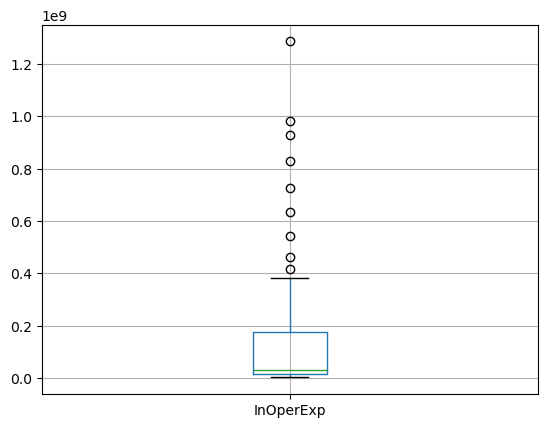

In [79]:
# Boxplot for InOperExp

hp_df.loc[:,['InOperExp']].boxplot()

<Axes: >

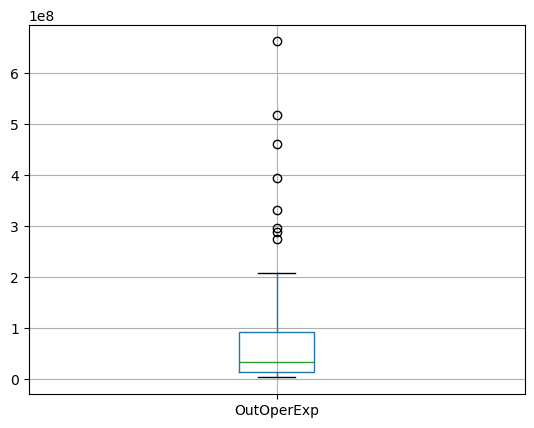

In [81]:
# Boxplot for OutOperExp

hp_df.loc[:,['OutOperExp']].boxplot()

<Axes: >

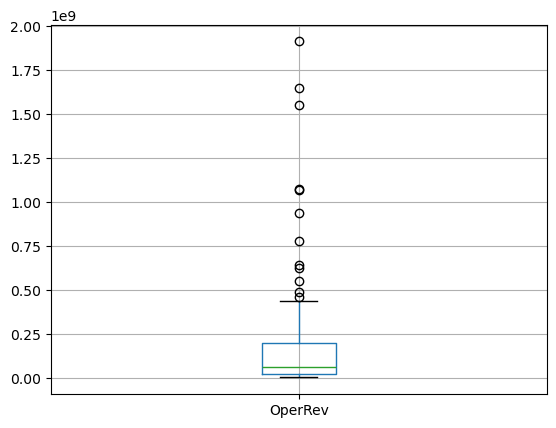

In [83]:
# Boxplot for OperRev

hp_df.loc[:,['OperRev']].boxplot()

<Axes: >

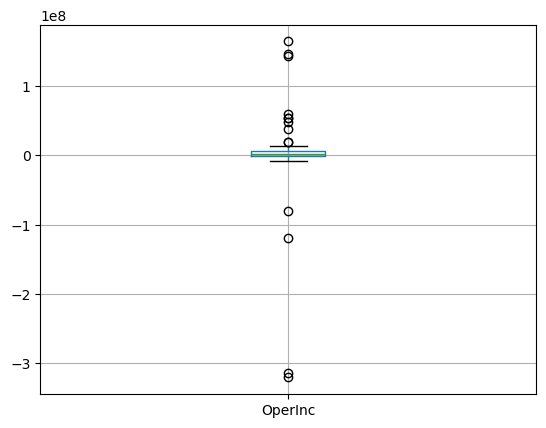

In [85]:
# Boxplot for OperInc

hp_df.loc[:,['OperInc']].boxplot()

<Axes: >

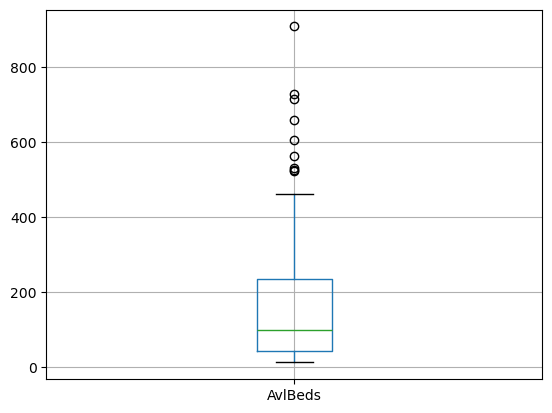

In [87]:
# Boxplot for AvlBeds

hp_df.loc[:,['AvlBeds']].boxplot()

According to the plots, all the variables have many outliers.

In [118]:
# Using OperRev, InOperExp and OperRev

lin_reg = smf.ols('NetPatRev ~ InOperExp + OperRev + OperInc', hp_df).fit()

In [120]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              NetPatRev   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     9357.
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.06e-76
Time:                        18:39:48   Log-Likelihood:                -745.33
No. Observations:                  61   AIC:                             1499.
Df Residuals:                      57   BIC:                             1507.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2375.5098   7803.006      0.304      0.762   -1.32e+04     1.8e+04
InOperExp     -0.0005      0.000     -2.595      0.012      -0.001      -0.000
OperRev        0.0029      0.000     21.701      0.000       0.003       0.003
OperInc       -0.0006      0.000     -3.500      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       26.041   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.670
Skew:                          -0.717   Prob(JB):                     2.63e-39
Kurtosis:                      11.237   Cond. No.                     7.09e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

((array([-2.28017173, -1.92017484, -1.7091256 , -1.55469152, -1.43036801,
         -1.3249031 , -1.23241216, -1.14940983, -1.07365152, -1.00360143,
         -0.93815914, -0.87650695, -0.81801894, -0.76220403, -0.70866868,
         -0.65709167, -0.60720655, -0.55878903, -0.51164772, -0.46561731,
         -0.42055328, -0.37632784, -0.33282677, -0.28994682, -0.24759369,
         -0.20568029, -0.16412527, -0.12285188, -0.08178679, -0.04085922,
          0.        ,  0.04085922,  0.08178679,  0.12285188,  0.16412527,
          0.20568029,  0.24759369,  0.28994682,  0.33282677,  0.37632784,
          0.42055328,  0.46561731,  0.51164772,  0.55878903,  0.60720655,
          0.65709167,  0.70866868,  0.76220403,  0.81801894,  0.87650695,
          0.93815914,  1.00360143,  1.07365152,  1.14940983,  1.23241216,
          1.3249031 ,  1.43036801,  1.55469152,  1.7091256 ,  1.92017484,
          2.28017173]),
  array([-2.01363762e+05, -1.77387221e+05, -6.83892756e+04, -1.89497190e+04,
         -1

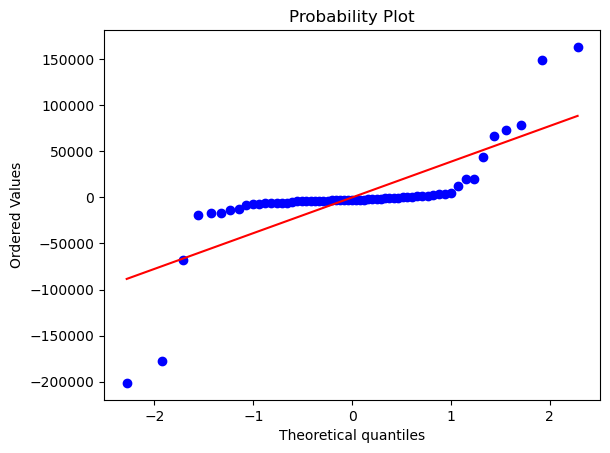

In [122]:
# QQ plot

sts.probplot(lin_reg.resid, dist="norm", plot=plt)

From the plot, most of the data points are not very aligned with the normal distribution line. Meaning they are mostly not normally distributed. There are a few outliers far away from the normal distribution line, which indicates it might have a heavy tail.

### Shapiro–Wilk test

In [158]:
clean = hp_df['InOperExp'].dropna()

W, p = sts.shapiro(clean)

print(f"W = {W:.4f}, p = {p:.4f}")

W = 0.6295, p = 0.0000


In [160]:
clean = hp_df['OperRev'].dropna()

W, p = sts.shapiro(clean)

print(f"W = {W:.4f}, p = {p:.4f}")

W = 0.6212, p = 0.0000


In [162]:
clean = hp_df['OperInc'].dropna()

W, p = sts.shapiro(clean)

print(f"W = {W:.4f}, p = {p:.4f}")

W = 0.5599, p = 0.0000


Most of the Ws from the result are around 0.6 with a low P value. This result agrees with the QQ plot, with most of the points near the normal distribution line
but not aligned. With some points far off the line. Not normally distributed.

### References

1. jklaus. (2016, August 23). pandas dataframe convert column type to string or categorical [Online forum post]. Stack Overflow.

2. 365 Data Science Tutorials. (2022). How To Create a Histogram in Python? https://www.youtube.com/watch?v=iTUQqBnUEq8 
YouTube

3. Chatgpt link: https://chatgpt.com/c/68086746-ebec-800c-95f7-eca031300a90
Screenshots in the repo, I used it for charts and Shapiro test.